# Machine Learning

#### Imports

In [57]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.preprocessing import LabelEncoder

pd.set_option('display.max_columns', None)

## Load data

In [58]:
PATH = '../data/processed/'

### Dados das Escolas (SARESP)

In [67]:
dataset = pd.read_csv(os.path.join(PATH, 'dataset.csv'), sep=',')
print(dataset.shape)
dataset.head()

(1458, 47)


,CD_ESCOLA,ds_comp,PONTUACAO,DESEMPENHO,CLUSTER,SALAS_AULA,SALA_RECURSO,TOT_SALAS_AULA,CANTINA,COPA,REFEITORIO,SALA_LEITURA,TOT_SALA_LEITURA,TOT_QUADRA,SALA_PROF,PATIO_COBERTO,PATIO_DESCOBERTO,TOT_VESTIARIO,LAB_INFO,LAB_CIENCIAS,LAB_CIENCIA_FISICA_BIOLOGICA,TOT_LAB_CIENCIA,LAB_MULTIUSO,OFICINA,DORMITORIO,SANITARIO_ADEQ_DEF,SANITARIO_AL_MASC,SANITARIO_AL_FEM,TOT_SANITARIO_AL,TOT_SANITARIO_FUNC,DEPEND_ADEQ_DEF,SALA_ED_FISICA,SALA_PROG_ESC_FAMILIA,BRINQUEDOTECA,SALA_REFORCO,AREA_SERVICO,SALA_ATENDIMENTO,SALA_ENTRETENIMENTO,APERF/EXTENSIAOCULTURAL,BACHARELADO/TECNIOLOGO,DOUTORADO,ENSINO_MEDIO,ESPECIALIZACAO,LICENCIATURA,MESTRADO,S/INFO,QTD_SERVIDORES
0,36444,MATEMÁTICA,BASICO,RUIM,12,19,0,19,0,0,1,1,1,2,1,0,0,0,1,0,0,0,0,0,0,0,1,1,2,0,0,1,0,0,0,0,0,0,0.0,0.000000,0.0,0.080000,0.040000,0.880000,0.0,0.0,25
1,1582,MATEMÁTICA,BASICO,RUIM,12,14,1,15,1,0,2,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,3,3,6,3,0,1,1,0,0,0,0,0,0.0,0.030303,0.0,0.000000,0.090909,0.878788,0.0,0.0,33
2,4388,MATEMÁTICA,BASICO,RUIM,12,26,0,26,1,0,1,1,1,2,1,2,1,0,1,0,1,1,0,0,0,0,3,3,6,2,0,1,0,0,0,0,0,0,0.0,0.037037,0.0,0.296296,0.037037,0.629630,0.0,0.0,27
3,4424,MATEMÁTICA,ADEQUADO,BOM,12,11,1,12,1,0,1,1,1,2,1,1,0,0,1,0,0,0,0,0,0,1,1,1,2,0,0,2,0,1,0,0,0,0,0.0,0.031250,0.0,0.093750,0.031250,0.843750,0.0,0.0,32
4,1739,MATEMÁTICA,ADEQUADO,BOM,12,8,1,9,0,0,1,1,1,1,1,1,0,0,1,0,0,0,0,0,0,0,1,1,2,2,0,1,0,0,0,0,0,0,0.0,0.047619,0.0,0.095238,0.000000,0.857143,0.0,0.0,21


## Encoder

In [68]:
# le = LabelEncoder()
# dataset['DESEMPENHO'] = le.fit_transform(dataset['DESEMPENHO'])

dataset['DESEMPENHO'] = dataset['DESEMPENHO'].replace({'RUIM' : 0, 'BOM': 1})

### Transformar atributo CLUSTER para One Hot Encoder 

In [ ]:
df_cluster_dummie = pd.get_dummies(dataset['CLUSTER'], prefix='CLUSTER_')
dataset = pd.concat([dataset.drop('CLUSTER', axis=1), df_cluster_dummie], axis=1)

## Separacao dos dados

In [69]:
dataset.head(2)

,CD_ESCOLA,ds_comp,PONTUACAO,DESEMPENHO,CLUSTER,SALAS_AULA,SALA_RECURSO,TOT_SALAS_AULA,CANTINA,COPA,REFEITORIO,SALA_LEITURA,TOT_SALA_LEITURA,TOT_QUADRA,SALA_PROF,PATIO_COBERTO,PATIO_DESCOBERTO,TOT_VESTIARIO,LAB_INFO,LAB_CIENCIAS,LAB_CIENCIA_FISICA_BIOLOGICA,TOT_LAB_CIENCIA,LAB_MULTIUSO,OFICINA,DORMITORIO,SANITARIO_ADEQ_DEF,SANITARIO_AL_MASC,SANITARIO_AL_FEM,TOT_SANITARIO_AL,TOT_SANITARIO_FUNC,DEPEND_ADEQ_DEF,SALA_ED_FISICA,SALA_PROG_ESC_FAMILIA,BRINQUEDOTECA,SALA_REFORCO,AREA_SERVICO,SALA_ATENDIMENTO,SALA_ENTRETENIMENTO,APERF/EXTENSIAOCULTURAL,BACHARELADO/TECNIOLOGO,DOUTORADO,ENSINO_MEDIO,ESPECIALIZACAO,LICENCIATURA,MESTRADO,S/INFO,QTD_SERVIDORES
0,36444,MATEMÁTICA,BASICO,0,12,19,0,19,0,0,1,1,1,2,1,0,0,0,1,0,0,0,0,0,0,0,1,1,2,0,0,1,0,0,0,0,0,0,0.0,0.000000,0.0,0.08,0.040000,0.880000,0.0,0.0,25
1,1582,MATEMÁTICA,BASICO,0,12,14,1,15,1,0,2,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,3,3,6,3,0,1,1,0,0,0,0,0,0.0,0.030303,0.0,0.00,0.090909,0.878788,0.0,0.0,33


In [70]:
dataset['DOUTORADO_BIN'] = 0
dataset.loc[dataset['DOUTORADO'] > 0, 'DOUTORADO_BIN'] = 1

dataset['MESTRADO_BIN'] = 0
dataset.loc[dataset['MESTRADO'] > 0, 'MESTRADO_BIN'] = 1

dataset['ESPECIALIZACAO_BIN'] = 0
dataset.loc[dataset['ESPECIALIZACAO'] > 0, 'ESPECIALIZACAO_BIN'] = 1

In [16]:
dataset.groupby(['DESEMPENHO'])['DOUTORADO_BIN'].value_counts(normalize=True).unstack() * 100

DOUTORADO_BIN,0,1
DESEMPENHO,,
BOM,98.556430,1.443570
RUIM,99.568966,0.431034


In [17]:
dataset.groupby(['DESEMPENHO'])['MESTRADO_BIN'].value_counts(normalize=True).unstack() * 100

MESTRADO_BIN,0,1
DESEMPENHO,,
BOM,89.763780,10.236220
RUIM,93.247126,6.752874


In [18]:
dataset.groupby(['DESEMPENHO'])['ESPECIALIZACAO_BIN'].value_counts(normalize=True).unstack() * 100

ESPECIALIZACAO_BIN,0,1
DESEMPENHO,,
BOM,20.341207,79.658793
RUIM,30.459770,69.540230


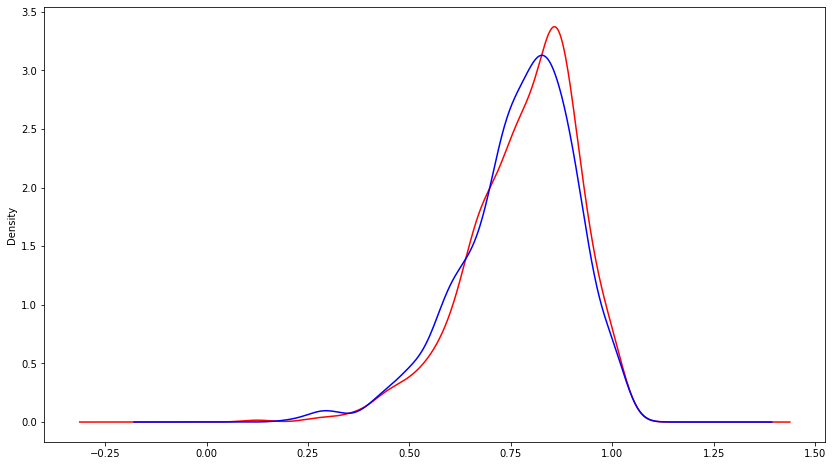

In [22]:
# dataset[['MESTRADO', 'DESEMPENHO']]
fig, ax = plt.subplots(figsize=(14,8))
dataset[dataset['DESEMPENHO'] == 'RUIM']['LICENCIATURA'].plot(kind='kde', color='red', ax=ax)
dataset[dataset['DESEMPENHO'] == 'BOM']['LICENCIATURA'].plot(kind='kde', color='blue', ax=ax)

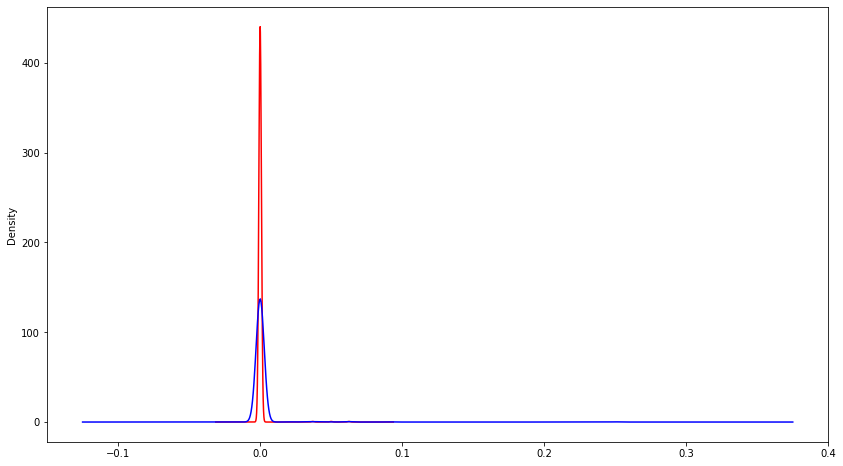

In [21]:
# dataset[['MESTRADO', 'DESEMPENHO']]
fig, ax = plt.subplots(figsize=(14,8))
dataset[dataset['DESEMPENHO'] == 'RUIM']['DOUTORADO'].plot(kind='kde', color='red', ax=ax)
dataset[dataset['DESEMPENHO'] == 'BOM']['DOUTORADO'].plot(kind='kde', color='blue', ax=ax)

In [71]:
dataset = dataset.drop(['CD_ESCOLA', 'ds_comp', 'PONTUACAO'], axis=1)

In [132]:
df_cluster_dummie = pd.get_dummies(dataset['CLUSTER'], prefix='CLUSTER_')
dataset = pd.concat([dataset.drop('CLUSTER', axis=1), df_cluster_dummie], axis=1)

In [133]:
X_train, X_test, y_train, y_test = train_test_split(dataset.drop('DESEMPENHO', axis=1), dataset['DESEMPENHO'], test_size=0.2, random_state=17)

In [134]:
X_train.drop(['DOUTORADO_BIN', 'MESTRADO_BIN', 'ESPECIALIZACAO_BIN'], axis=1, inplace=True)
X_test.drop(['DOUTORADO_BIN', 'MESTRADO_BIN', 'ESPECIALIZACAO_BIN'], axis=1, inplace=True)

## Modeling

In [123]:
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()
# scaler.fit(X_train)

# columns = X_train.columns
# X_train = scaler.transform(X_train)
# X_test = scaler.transform(X_test)

# X_train = pd.DataFrame(X_train, columns=columns)
# X_test = pd.DataFrame(X_test, columns=columns)

In [144]:
model = RandomForestClassifier(n_estimators=300, random_state=17, n_jobs=-1)
model.fit(X_train, y_train)
pred = model.predict(X_test)

In [145]:
print('Acc score:', accuracy_score(y_test, pred))
print('F1 score:', f1_score(y_test, pred))
print('AUC ROC:', roc_auc_score(y_test, pred))

Acc score: 0.6986301369863014
F1 score: 0.7124183006535948
AUC ROC: 0.6979357690318334


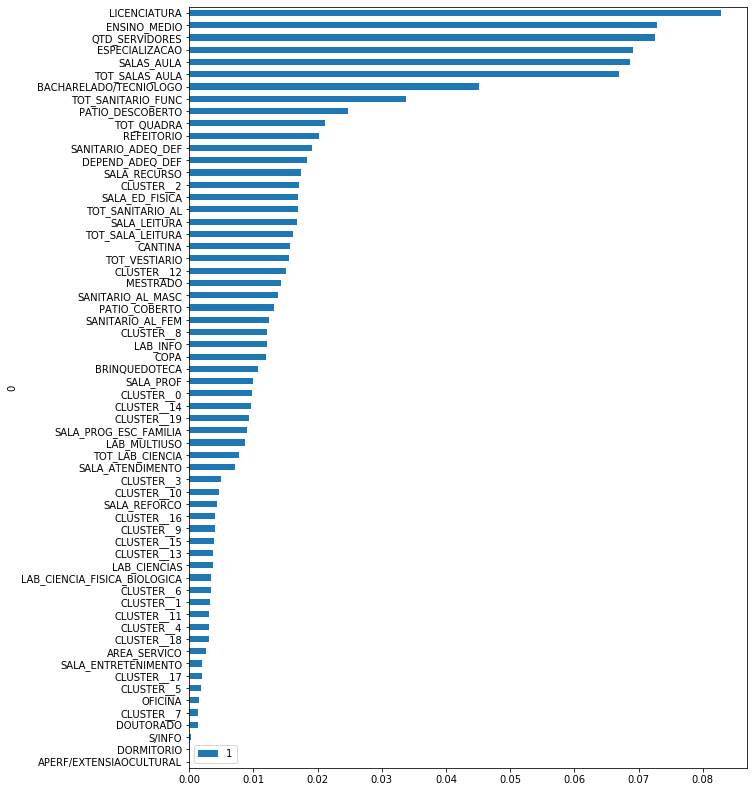

In [137]:
pd.DataFrame(zip(X_train.columns, model.feature_importances_)).set_index(0).sort_values(by=1).plot(kind='barh', figsize=(10, 14))

## Results

1 - Primeiro modelo
 - Acc score: 0.6643835616438356
 - F1 score: 0.6370370370370371
 - AUC ROC: 0.6622936944561998

2 - Valores normalizados das formacoes dos servidores (antes era contagem)
- Acc score: 0.6575342465753424
- F1 score: 0.6212121212121212
- AUC ROC: 0.654441152959985

3 - Valores normalizados das formacoes dos servidores e QTD_SERVIDORES
- Acc score: 0.636986301369863
- F1 score: 0.5923076923076923
- AUC ROC: 0.6331875675929844


4 - Valores normalizados das formacoes dos servidores e QTD_SERVIDORES (CORRECAO) - filtrar professores Basico I
- Acc score: 0.6506849315068494
- F1 score: 0.6772151898734177
- AUC ROC: 0.6482343536935158

5 - Valores normalizados das formacoes dos servidores e QTD_SERVIDORES. Remocao de {FORMACAO}_BIN
- Acc score: 0.6746575342465754
- F1 score: 0.6984126984126985
- AUC ROC: 0.6724267644707764

6 - Contagem das formacoes dos servidores e QTD_SERVIDORES. Remocao de {FORMACAO}_BIN
- Acc score: 0.6712328767123288
- F1 score: 0.6981132075471698
- AUC ROC: 0.668500493722669

7 - Configuracao 6 e transformacao em CLUSTER para One Hot Encoder
- Acc score: 0.6986301369863014
- F1 score: 0.7124183006535948
- AUC ROC: 0.6979357690318334